<a href="https://colab.research.google.com/github/Makaadam11/Python/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
# !wget https://drive.google.com/drive/folders/1ITSCmnwqqsiaatnZyKBxpjearMU8brMZ

--2023-12-04 06:59:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wine.data.1’

wine.data.1             [ <=>                ]  10.53K  --.-KB/s    in 0s      

2023-12-04 06:59:25 (124 MB/s) - ‘wine.data.1’ saved [10782]



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
from scipy.stats import ttest_ind
from keras import layers
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import tensorflow as tf
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import random as random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
column_names = [
    'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
    'Proline'
]

df = pd.DataFrame(pd.read_csv('wine.data', header=None, names=column_names))
df1 = pd.DataFrame(pd.read_csv('V2_MASTER_PhonesmartdataAll_CCI_AdvStats.csv'))
df2 = pd.DataFrame(pd.read_csv('Housing.csv'))
df3 = pd.DataFrame(pd.read_csv('data.csv'))

# ---------------------wine.data--------------------------------------------------

In [20]:
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [21]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


all columns are numerical

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

split into categorical and numerical data

In [23]:
# Classify variables
categorical_columns = df.select_dtypes(include=['object']).columns
non_categorical_columns = df.select_dtypes(exclude=['object']).columns

# Display the results
print("Categorical Columns:")
print(categorical_columns)

print("\nNon-Categorical Columns:")
print(non_categorical_columns)

Categorical Columns:
Index([], dtype='object')

Non-Categorical Columns:
Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


Epoch 1/10
5/5 [==============================] - 2s 9ms/step - loss: 60.3235
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 20.6836
Epoch 3/10
5/5 [==============================] - 0s 13ms/step - loss: 19.8984
Epoch 4/10
5/5 [==============================] - 0s 12ms/step - loss: 20.3970
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 14.4179
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 16.1418
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 14.3667
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 12.5265
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 12.2050
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 10.5545
Epoch 1/10
5/5 [==============================] - 0s 112ms/step - loss: 9.4974 - val_loss: 11.0365
Epoch 2/10
5/5 [==============================] - 0s 29ms/step - loss: 8.8335 - val_loss: 9.6086
Epoch 3/10
5/5 [==

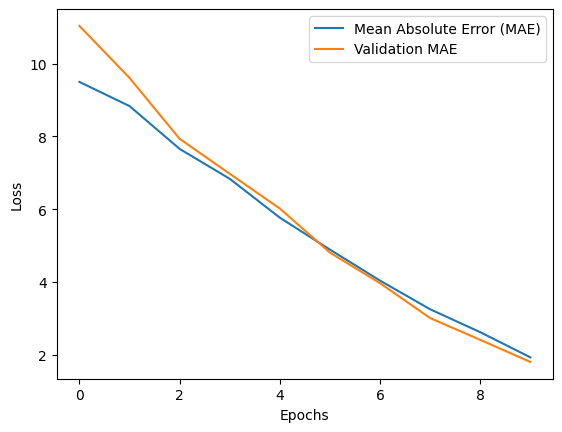

Epoch 1/10
5/5 [==============================] - 1s 4ms/step - loss: 26.9297
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 22.3897
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 13.2731
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 11.8628
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 8.3201
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 4.9904
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 3.2110
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 2.6749
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 2.1148
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 2.1952
Epoch 1/10
5/5 [==============================] - 0s 42ms/step - loss: 2.1229 - val_loss: 2.5178
Epoch 2/10
5/5 [==============================] - 0s 14ms/step - loss: 2.2057 - val_loss: 1.7858
Epoch 3/10
5/5 [===============

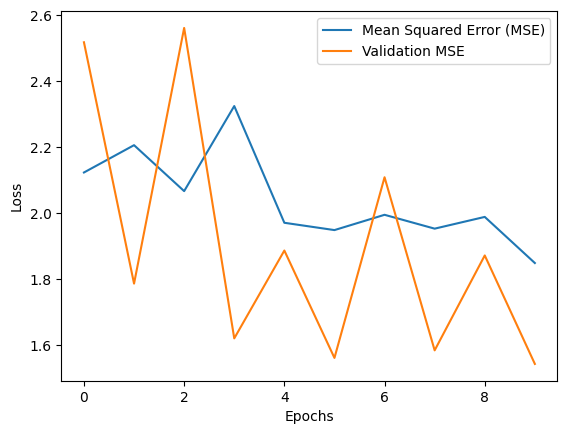

In [24]:
# Select independent variables
X = df.drop('Alcohol', axis=1) # Use double brackets to create a DataFrame
y = df['Alcohol']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = keras.Sequential([
    layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    layers.Dense(1, activation='linear')  # Output layer for regression task
])

model.compile(optimizer='adam', loss='mean_absolute_error')  # L1 Loss

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Train the model with mean_absolute_error loss
history1 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot Mean Absolute Error Loss
plt.plot(history1.history['loss'], label='Mean Absolute Error (MAE)')
plt.plot(history1.history['val_loss'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.compile(optimizer='adam', loss='mean_squared_error')  # L2 Loss

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)
# Train the model with mean_squared_error loss
history2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot Mean Squared Error Loss
plt.plot(history2.history['loss'], label='Mean Squared Error (MSE)')
plt.plot(history2.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Better loss function is L1 loss with more constantly decresing loss. L1 loss model is learning and improving its performance on the training data, not like L2 loss.



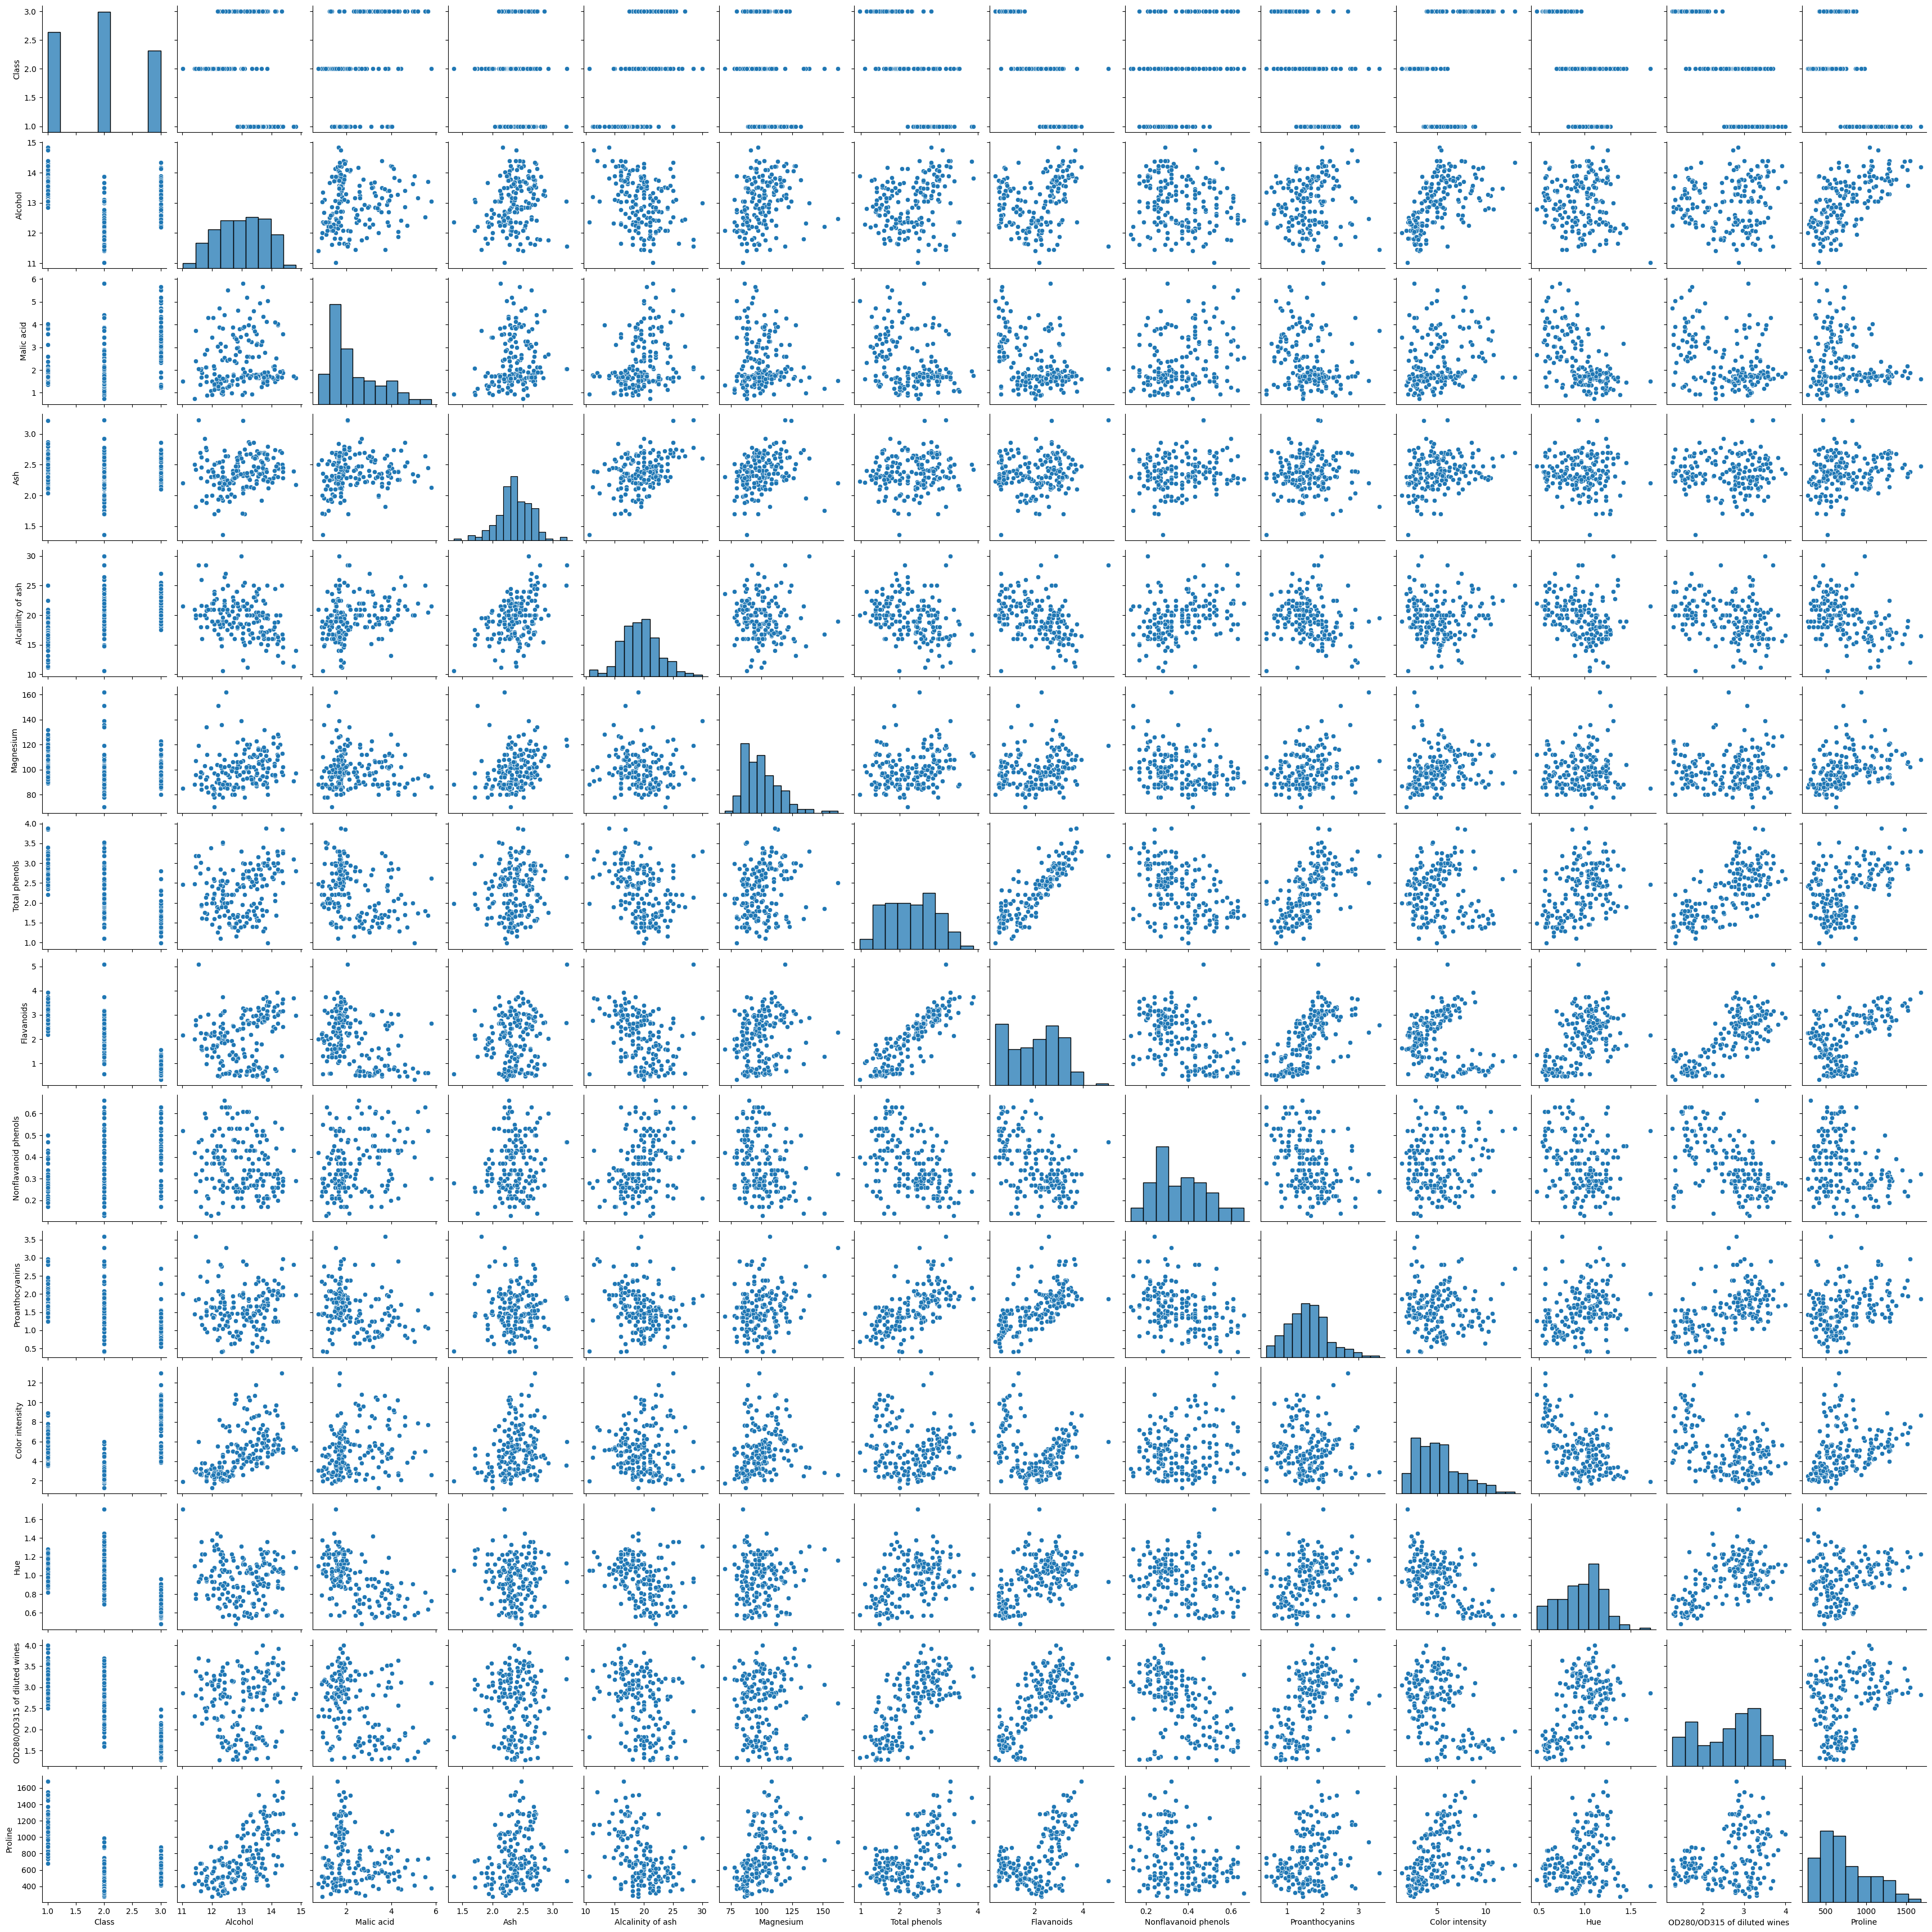

In [25]:
sns.pairplot(df)
plt.show()

We can see from plot above that dataset isn't Linear because data values are rather irregular

In [26]:
df.columns = df.columns.str.replace(' ', '_')
# ANOVA
formula = 'Class ~ Malic_acid + Alcalinity_of_ash + Magnesium + Total_phenols + Flavanoids + Nonflavanoid_phenols + Proanthocyanins + Color_intensity + Hue + Proline'
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)
print('\n--------------')
formula = 'Alcohol ~ Malic_acid + Alcalinity_of_ash + Magnesium + Total_phenols + Flavanoids + Nonflavanoid_phenols + Proanthocyanins + Color_intensity + Hue + Proline'
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)
df.columns = df.columns.str.replace('_',' ')


                         sum_sq     df          F        PR(>F)
Malic_acid             0.004673    1.0   0.057828  8.102566e-01
Alcalinity_of_ash      1.633064    1.0  20.210884  1.292264e-05
Magnesium              0.000973    1.0   0.012041  9.127528e-01
Total_phenols          0.095427    1.0   1.181012  2.787161e-01
Flavanoids             7.130338    1.0  88.245443  4.282146e-17
Nonflavanoid_phenols   0.055102    1.0   0.681940  4.100975e-01
Proanthocyanins        0.098049    1.0   1.213457  2.722336e-01
Color_intensity        3.234085    1.0  40.025203  2.215781e-09
Hue                    0.148385    1.0   1.836423  1.772010e-01
Proline                6.631799    1.0  82.075494  3.381391e-16
Residual              13.493801  167.0        NaN           NaN

--------------
                         sum_sq     df          F        PR(>F)
Malic_acid             2.709927    1.0   9.393886  2.539395e-03
Alcalinity_of_ash      1.250076    1.0   4.333353  3.889784e-02
Magnesium              0

Variables such as Flavanoids, Color_intensity, Alcalinity_of_ash and Proline contribute significantly to the observed variation from the rest of observations regarding Wine Class.

Variables such as Malic_acid, Proline, Color_intensity contribute significantly to the observed variation from the rest of observations regarding Alcohol level.

In [27]:
# Bivariate correlation table
correlation_table = df[non_categorical_columns].corr()

print("Bivariate Correlation Table:")
correlation_table

Bivariate Correlation Table:


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


Most vairables have negative correlation to others but there are some with positive correlation e.g Color_intensity is strongly dependant on many other factors. Alcohol is correlated to Proline and Color_intensity, Ash, Magnesium Flavanoids and Total phenols.

In [28]:
# Linear regression
# Define response variable
y = df['Alcohol']

# Define explanatory variables
x = df[non_categorical_columns].drop('Alcohol', axis=1)

# Add constant to predictor variables
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print("\nLinear Regression Model Summary:")
model.summary()


Linear Regression Model Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     20.32
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           7.07e-28
Time:                        07:00:44   Log-Likelihood:                -129.56
No. Observations:                 178   AIC:                             287.1
Df Residuals:                     164   BIC:                             331.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           12.6359      0.762     16.574      0.000      11.130      14.141
Class                           -0.4922      0.155     -3.166      0.002      -0.799      -0.185
Malic acid                       0.1389      0.044      3.146      0.002       0.052       0.226
Ash                              0.0568      0.213      0.267      0.790      -0.363       0.477
Alcalinity of ash               -0.0160      0.019     -0.857      0.393      -0.053       0.021
Magnesium                       -0.0002      0.003     -0.072      0.942      -0.007       0.006
Total phenols                    0.1201      0.132      0.908      0.365      -0.141       0.381
Flavanoids                      -0.1747      0.119     -1.465      0.145      -0.410       0.061
Nonflavanoid phenols            -0.3452      0.424     -0.813      0.417      -1.183       0.493
Proanthocyanins                 -0.1243      0.096     -1.294      0.197      -0.314       0.065
Color intensity                  0.1909      0.028      6.785      0.000       0.135       0.246
Hue                              0.1309      0.275      0.476      0.635      -0.412       0.674
OD280/OD315 of diluted wines     0.0186      0.116      0.161      0.873      -0.210       0.247
Proline                          0.0006      0.000      2.631      0.009       0.000       0.001
==============================================================================
Omnibus:                        0.948   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.623   Jarque-Bera (JB):                0.834
Skew:                           0.168   Prob(JB):                        0.659
Kurtosis:                       2.997   Cond. No.                     1.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 Model shows a reasonably good fit, but some variables may not be significant predictors of Alcohol like: 'Ash,' 'Alcalinity of ash,' 'Magnesium,' 'Total phenols,' 'Flavanoids,' 'Nonflavanoid phenols,' 'Proanthocyanins,' 'Hue,' and 'OD280/OD315 of diluted wines'


 ------- regression_results -------
Mean Squared Error (MSE): 0.1726236294718678
Root Mean Squared Error (RMSE): 0.4154799988830603
Mean Absolute Error (MAE): 0.3574143615102692
R-squared (R2): 0.7108655314171186


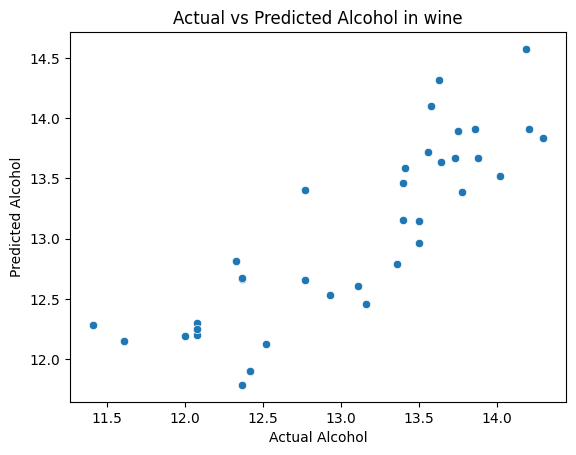

In [29]:
def regression(df):
    # Select independent variables
    X = df.drop('Alcohol', axis=1) # Use double brackets to create a DataFrame
    # Use double brackets to create a DataFrame
    y = df['Alcohol']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_scaled)

    # Evaluate the results
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Assuming y_true and y_pred are your true and predicted values

    # Regression Metrics
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("R-squared (R2):", r2_score(y_test, y_pred))

    # Plot the results
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title('Actual vs Predicted Alcohol in wine')
    plt.xlabel('Actual Alcohol')
    plt.ylabel('Predicted Alcohol')
    plt.show()

print('\n ------- regression_results -------')
regression(df)

Model fit quite well as it more close to Linearity don't have strong deviations.It has relatively low errors (MSE, RMSE, and MAE) and the reasonably high R-squared value

## 6. Overfitting in the context of Regression

Degree-10 Polynomial Regression Results:
Training RMSE: 0.15444743075577017
Test RMSE: 10.400039098755345
Training R-squared: 0.9600670622834897
Test R-squared: -184.4185370096684


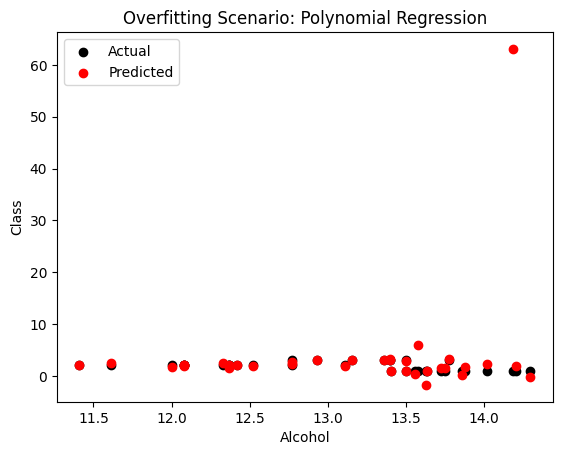

In [30]:
# Use a subset of features
selected_features = ['Alcohol', 'Flavanoids', 'Color intensity', 'Proline']

# Create a scenario for overfitting
df_subset = df[selected_features + ['Class']]

# Split the data into features (X) and target variable (y)
X = df_subset.drop('Class', axis=1)
y = df_subset['Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a high-degree polynomial regression model
degree = 10
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train_poly)

# Predict on the test set
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f"Degree-{degree} Polynomial Regression Results:")
print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Training R-squared: {r2_train}")
print(f"Test R-squared: {r2_test}")

# Plot the results
plt.scatter(X_test['Alcohol'], y_test, color='black', label='Actual')
plt.scatter(X_test['Alcohol'], y_test_pred, color='red', label='Predicted')
plt.xlabel('Alcohol')
plt.ylabel('Class')
plt.legend()
plt.title('Overfitting Scenario: Polynomial Regression')
plt.show()


model performs rather well on the training data (as indicated by the high training R-squared and low training RMSE), but it fails to generalize to the test data, resulting is significantly negative test R-squared and a high test RMSE.

------------------------------V2_MASTER_PhonesmartdataAll_CCI_AdvStats--------------------------------




In [31]:
df1

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single,Mean_VS_RT_correct_Single,Mean_VS_RT_correct_Conjunction
0,2022,16,2.0,4,49,70,iphone,0,32,1178.700000,1216.387500,827.116332,925.624053
1,2021,37,2.0,8,44,33,iphone,0,32,946.470000,785.597500,NaN,NaN
2,2022,16,1.0,4,20,40,iphone,0,32,1182.741667,950.900000,NaN,NaN
3,2022,16,1.0,2,21,0,iphone,0,32,1778.950000,984.333333,NaN,NaN
4,2022,16,2.0,4,21,0,iphone,0,32,521.500000,503.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1.0,3,56,39,iPhone,507,32,915.785917,747.883194,NaN,NaN
544,2020,27,2.0,5,64,77,iPhone,267,32,877.783333,720.729583,NaN,NaN
545,2020,36,2.0,2,46,43,iPhone,610,32,1211.483333,1049.979167,NaN,NaN
546,2020,31,2.0,4,67,69,iPhone,558,32,899.774583,845.612083,NaN,NaN


In [32]:
df1.describe()

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single,Mean_VS_RT_correct_Single,Mean_VS_RT_correct_Conjunction
count,548.000000,548.000000,543.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,1.000000,1.000000
mean,2020.711679,29.677007,1.788214,3.237226,46.985401,50.470803,181.753650,49.394161,942.567275,841.467643,827.116332,925.624053
std,0.731187,8.828638,0.435179,1.741609,11.955576,25.344736,177.331993,36.985764,195.525323,172.026277,NaN,NaN
min,2020.000000,16.000000,1.000000,0.000000,20.000000,0.000000,0.000000,32.000000,521.500000,503.000000,827.116332,925.624053
25%,2020.000000,24.000000,2.000000,2.000000,39.000000,33.000000,0.000000,32.000000,823.408271,730.852768,827.116332,925.624053
50%,2021.000000,28.500000,2.000000,3.000000,47.000000,49.000000,169.500000,32.000000,903.227792,796.977778,827.116332,925.624053
75%,2021.000000,34.000000,2.000000,4.000000,55.000000,67.000000,297.000000,32.000000,1012.179167,886.148194,827.116332,925.624053
max,2022.000000,101.000000,3.000000,10.000000,77.000000,140.000000,1157.000000,272.000000,2125.150000,1896.975000,827.116332,925.624053


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            548 non-null    int64  
 1   Age                             548 non-null    int64  
 2   GenderNum                       543 non-null    float64
 3   AutismQuotient                  548 non-null    int64  
 4   STAI                            548 non-null    int64  
 5   BRIEF_Total                     548 non-null    int64  
 6   Device                          548 non-null    object 
 7   DailyAvgMins                    548 non-null    int64  
 8   DailyAvePickups                 548 non-null    int64  
 9   VS_RT_correct_Conjunction       548 non-null    float64
 10  VS_RT_correct_Single            548 non-null    float64
 11  Mean_VS_RT_correct_Single       1 non-null      float64
 12  Mean_VS_RT_correct_Conjunction  1 no

dataframe is mostly numerical with one categorical column Device

In [34]:
# Classify variables
categorical_columns = df1.select_dtypes(include=['object']).columns
non_categorical_columns = df1.select_dtypes(exclude=['object']).columns

# Display the results
print("Categorical Columns:")
print(categorical_columns)

print("\nNon-Categorical Columns:")
print(non_categorical_columns)

Categorical Columns:
Index(['Device'], dtype='object')

Non-Categorical Columns:
Index(['Year', 'Age', 'GenderNum', 'AutismQuotient', 'STAI', 'BRIEF_Total',
       'DailyAvgMins', 'DailyAvePickups', 'VS_RT_correct_Conjunction',
       'VS_RT_correct_Single', 'Mean_VS_RT_correct_Single',
       'Mean_VS_RT_correct_Conjunction'],
      dtype='object')


Exploratory Analysis

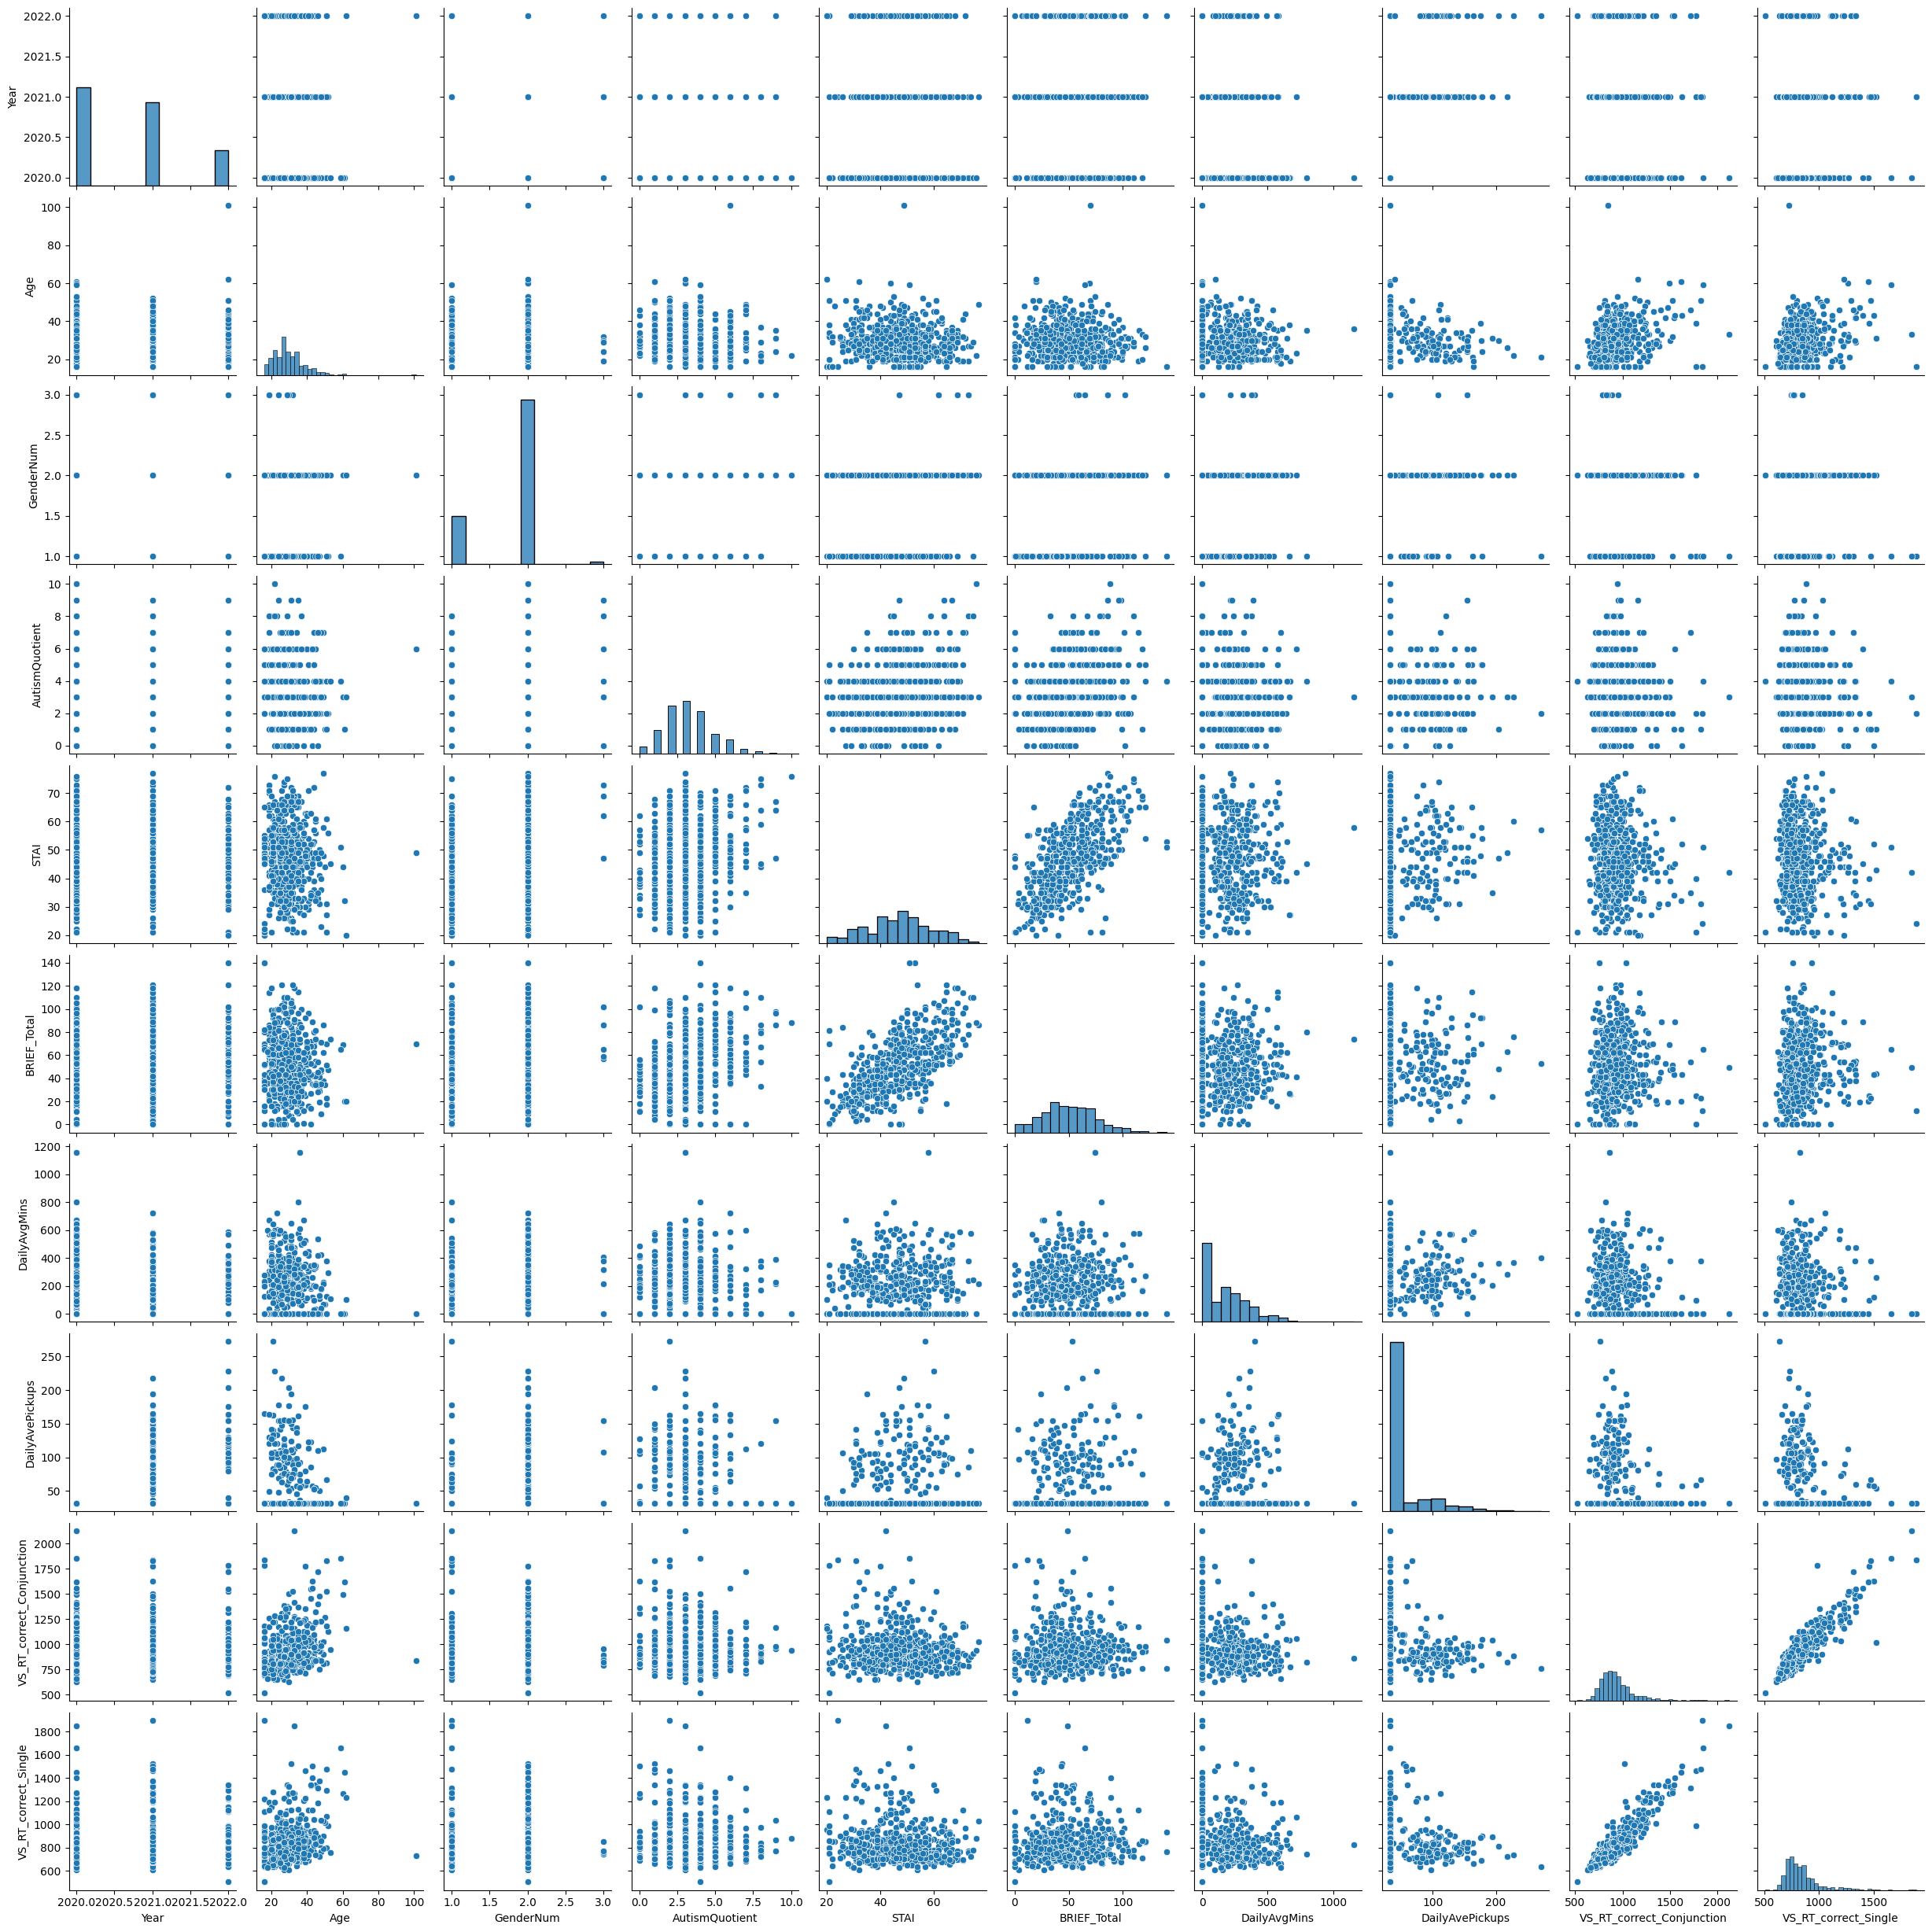

In [35]:

# Visualize the relationship between variables
sns.pairplot(df1[non_categorical_columns].drop(columns=['Mean_VS_RT_correct_Conjunction',	'Mean_VS_RT_correct_Single']))
plt.show()

From plots we can understand that many of column values are divided into groups and are not continous. It can also be seen that data set in not Linear.

## 2. loss functions

Epoch 1/10
14/14 [==============================] - 1s 2ms/step - loss: 178.6729
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 178.6077
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 178.5432
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 178.4627
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 178.3651
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 178.2649
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 178.1431
Epoch 8/10
14/14 [==============================] - 0s 3ms/step - loss: 178.0100
Epoch 9/10
14/14 [==============================] - 0s 2ms/step - loss: 177.8612
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 177.6880
Epoch 1/20
14/14 [==============================] - 0s 15ms/step - loss: 177.5004 - val_loss: 192.2598
Epoch 2/20
14/14 [==============================] - 0s 5ms/step - loss: 177.2986 - val

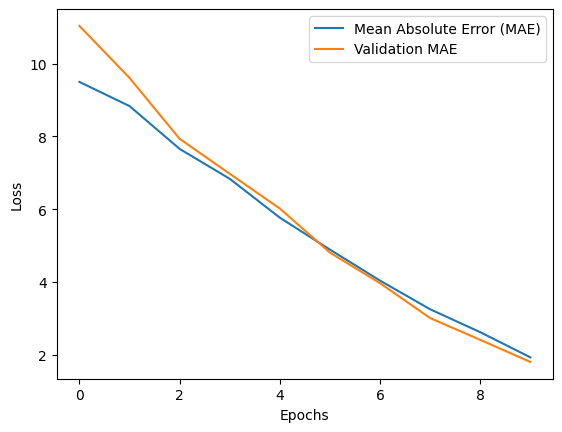

Epoch 1/10
14/14 [==============================] - 1s 2ms/step - loss: 54293.5586
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 53891.3203
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 53480.8281
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 53067.4141
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 52627.3672
Epoch 6/10
14/14 [==============================] - 0s 3ms/step - loss: 52200.8438
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 51763.4688
Epoch 8/10
14/14 [==============================] - 0s 2ms/step - loss: 51301.5703
Epoch 9/10
14/14 [==============================] - 0s 3ms/step - loss: 50841.0859
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 50379.2812
Epoch 1/10
14/14 [==============================] - 0s 14ms/step - loss: 49905.3594 - val_loss: 52260.4883
Epoch 2/10
14/14 [==============================] - 0s 5ms/ste

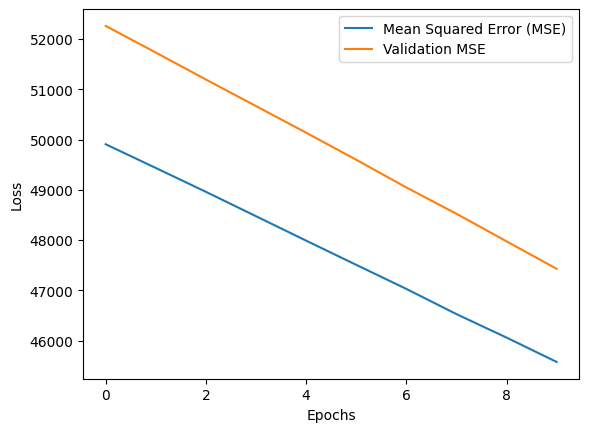

In [36]:
# Select independent variables
X = df1[['Age', 'STAI', 'BRIEF_Total','DailyAvePickups', 'VS_RT_correct_Conjunction', 'VS_RT_correct_Single']]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = df1['DailyAvgMins']


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = keras.Sequential([
    layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    layers.Dense(1, activation='linear')  # Output layer for regression task
])

model.compile(optimizer='adam', loss='mean_absolute_error')  # L1 Loss

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Train the model with mean_absolute_error loss
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot Mean Absolute Error Loss
plt.plot(history1.history['loss'], label='Mean Absolute Error (MAE)')
plt.plot(history1.history['val_loss'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.compile(optimizer='adam', loss='mean_squared_error')  # L2 Loss

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)
# Train the model with mean_squared_error loss
history2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot Mean Squared Error Loss
plt.plot(history2.history['loss'], label='Mean Squared Error (MSE)')
plt.plot(history2.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



L1 and L2 loss model is learning and improving its performance on the training data. Results suggest that the neural network is learning effectively.


In [37]:
import statsmodels.api as sm

# Bivariate correlation table
correlation_table = df1[non_categorical_columns].corr()

print("Bivariate Correlation Table:")
correlation_table

Bivariate Correlation Table:


,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single,Mean_VS_RT_correct_Single,Mean_VS_RT_correct_Conjunction
Year,1.000000,-0.014169,-0.001453,0.088263,0.027123,0.079353,-0.185560,0.358031,0.029299,0.056883,NaN,NaN
Age,-0.014169,1.000000,0.033383,-0.078235,-0.074555,-0.034091,-0.048672,-0.087632,0.294910,0.286206,NaN,NaN
GenderNum,-0.001453,0.033383,1.000000,-0.055103,0.107345,0.023189,0.055532,0.079455,-0.012430,0.002312,NaN,NaN
AutismQuotient,0.088263,-0.078235,-0.055103,1.000000,0.244425,0.295085,-0.111035,-0.035852,-0.008032,-0.009739,NaN,NaN
STAI,0.027123,-0.074555,0.107345,0.244425,1.000000,0.632384,-0.011529,0.075362,-0.107461,-0.090532,NaN,NaN
BRIEF_Total,0.079353,-0.034091,0.023189,0.295085,0.632384,1.000000,0.026128,0.069539,-0.017695,-0.000901,NaN,NaN
DailyAvgMins,-0.185560,-0.048672,0.055532,-0.111035,-0.011529,0.026128,1.000000,0.247063,-0.119006,-0.120915,NaN,NaN
DailyAvePickups,0.358031,-0.087632,0.079455,-0.035852,0.075362,0.069539,0.247063,1.000000,-0.078721,-0.078193,NaN,NaN
VS_RT_correct_Conjunction,0.029299,0.294910,-0.012430,-0.008032,-0.107461,-0.017695,-0.119006,-0.078721,1.000000,0.903221,NaN,NaN
VS_RT_correct_Single,0.056883,0.286206,0.002312,-0.009739,-0.090532,-0.000901,-0.120915,-0.078193,0.903221,1.000000,NaN,NaN


Corelation is rather divided with more negative corelations. For example strong positive correlation is between two variables: "DailyAvePickups" and "DailyAvgMins". For instance, "DailyAvePickups" and "Age" have negative correlation coefficient.

Inferential Analysis

In [47]:
from statsmodels.multivariate.manova import MANOVA
formula = 'VS_RT_correct_Single ~ BRIEF_Total + Age + AutismQuotient + STAI + GenderNum + DailyAvgMins + DailyAvePickups'
model = ols(formula, data=df1).fit()
# Perform ANOVA
anova_table = anova_lm(model, typ=2)

print(anova_table)
print("\n------------------------------")

formula = 'VS_RT_correct_Conjunction ~ BRIEF_Total + Age + AutismQuotient + STAI + GenderNum + DailyAvgMins + DailyAvePickups'
model = ols(formula, data=df1).fit()

# Perform ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)


                       sum_sq     df          F        PR(>F)
BRIEF_Total      7.831078e+04    1.0   2.927113  8.768278e-02
Age              1.185839e+06    1.0  44.324495  6.909751e-11
AutismQuotient   1.012218e+01    1.0   0.000378  9.844884e-01
STAI             1.434152e+05    1.0   5.360596  2.097415e-02
GenderNum        2.425887e+03    1.0   0.090675  7.634375e-01
DailyAvgMins     1.672905e+05    1.0   6.253012  1.269625e-02
DailyAvePickups  1.229689e+04    1.0   0.459635  4.980876e-01
Residual         1.431317e+07  535.0        NaN           NaN

------------------------------
                       sum_sq     df          F        PR(>F)
BRIEF_Total      7.297917e+04    1.0   2.123560  1.456357e-01
Age              1.637836e+06    1.0  47.658022  1.442163e-11
AutismQuotient   1.287262e+03    1.0   0.037457  8.466111e-01
STAI             2.107901e+05    1.0   6.133606  1.357169e-02
GenderNum        4.029924e+01    1.0   0.001173  9.726956e-01
DailyAvgMins     1.893255e+05    1.0  

Only Age contribute significantly to the observed variation from the rest of observations regarding VS_RT_correct_Single and VS_RT_correct_Conjunction.

In [39]:
# Linear regression
# Define response variable
y = df1['VS_RT_correct_Single']

# Define explanatory variables
x = df1[['Age', 'STAI', 'BRIEF_Total', 'DailyAvgMins']]

# Add constant to predictor variables
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print("\nLinear Regression Model Summary:")
model.summary()


Linear Regression Model Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     VS_RT_correct_Single   R-squared:                       0.104
Model:                              OLS   Adj. R-squared:                  0.097
Method:                   Least Squares   F-statistic:                     15.71
Date:                  Mon, 04 Dec 2023   Prob (F-statistic):           3.56e-12
Time:                          07:01:46   Log-Likelihood:                -3568.0
No. Observations:                   548   AIC:                             7146.
Df Residuals:                       543   BIC:                             7167.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          758.8115     39.545     19.188      0.000     681.131     836.492
Age              5.3433      0.795      6.722      0.000       3.782       6.905
STAI            -1.8836      0.757     -2.488      0.013      -3.371      -0.397
BRIEF_Total      0.6390      0.356      1.793      0.074      -0.061       1.339
DailyAvgMins    -0.1082      0.040     -2.739      0.006      -0.186      -0.031
==============================================================================
Omnibus:                      258.610   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1568.169
Skew:                           2.015   Prob(JB):                         0.00
Kurtosis:                      10.242   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 Model explains 10.4% of the DV variance. 15.71 with a very low p-value (3.56e-12) so at least one factor is significant to DV. Overall "Age," "STAI," and "DailyAvgMins" are significant predictors of "VS_RT_correct_Single," with "BRIEF_Total" being marginally significant.


 ------- regression_results -------
Mean Squared Error (MSE): 17868.666292620128
Root Mean Squared Error (RMSE): 133.6737307499874
Mean Absolute Error (MAE): 102.29022759213551
R-squared (R2): 0.11028322372171906


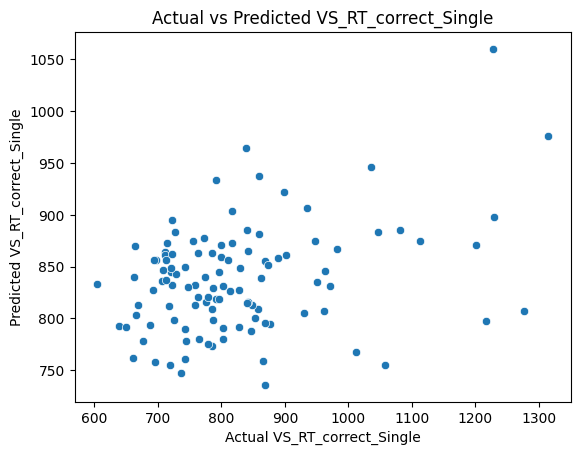

In [40]:
def regression(df):
    # Select independent variables
    X = df1[['Age', 'STAI', 'BRIEF_Total', 'DailyAvgMins']] # Use double brackets to create a DataFrame
    # Use double brackets to create a DataFrame
    y = df1['VS_RT_correct_Single']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_scaled)

    # Evaluate the results
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("R-squared (R2):", r2_score(y_test, y_pred))

    # Plot the results
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title('Actual vs Predicted VS_RT_correct_Single')
    plt.xlabel('Actual VS_RT_correct_Single')
    plt.ylabel('Predicted VS_RT_correct_Single')
    plt.show()

print('\n ------- regression_results -------')
regression(df1)

Model has a relatively high level of error of the high MSE, RMSE, and MAE. The R-squared value explains only a small part of the variability in the data.

In [41]:
df1

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single,Mean_VS_RT_correct_Single,Mean_VS_RT_correct_Conjunction
0,2022,16,2.0,4,49,70,iphone,0,32,1178.700000,1216.387500,827.116332,925.624053
1,2021,37,2.0,8,44,33,iphone,0,32,946.470000,785.597500,NaN,NaN
2,2022,16,1.0,4,20,40,iphone,0,32,1182.741667,950.900000,NaN,NaN
3,2022,16,1.0,2,21,0,iphone,0,32,1778.950000,984.333333,NaN,NaN
4,2022,16,2.0,4,21,0,iphone,0,32,521.500000,503.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1.0,3,56,39,iPhone,507,32,915.785917,747.883194,NaN,NaN
544,2020,27,2.0,5,64,77,iPhone,267,32,877.783333,720.729583,NaN,NaN
545,2020,36,2.0,2,46,43,iPhone,610,32,1211.483333,1049.979167,NaN,NaN
546,2020,31,2.0,4,67,69,iPhone,558,32,899.774583,845.612083,NaN,NaN


-------------------------------Housing-------------------------------------------------

In [42]:
df2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [43]:
df2.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [45]:
categorical_columns = df2.select_dtypes(include=['object']).columns
non_categorical_columns = df2.select_dtypes(exclude=['object']).columns

# Display the results
print("Categorical Columns:")
print(categorical_columns)

print("\nNon-Categorical Columns:")
print(non_categorical_columns)

Categorical Columns:
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

Non-Categorical Columns:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


In [46]:
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

ValueError: ignored

<Figure size 800x500 with 0 Axes>

In [ ]:
# Exploratory Analysis
# Visualize the relationship between variables
sns.pairplot(df2)
plt.show()

## 2. Regression Loss Functions

In [ ]:
# Assuming X_train and y_train are your training data and labels
# Update the input and output dimensions based on your dataset
# Select independent variables
df_numerical = df2.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], axis=1)
 # Use double brackets to create a DataFrame
X = df_numerical.drop('price', axis=1)
y = df_numerical['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = keras.Sequential([
    layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    layers.Dense(1, activation='linear')  # Output layer for regression task
])

model.compile(optimizer='adam', loss='mean_absolute_error')  # L1 Loss

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

model.compile(optimizer='adam', loss='mean_squared_error')  # L2 Loss

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Train the model with mean_absolute_error loss
history1 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot Mean Absolute Error Loss
plt.plot(history1.history['loss'], label='Mean Absolute Error (MAE)')
plt.plot(history1.history['val_loss'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Train the model with mean_squared_error loss
history2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot Mean Squared Error Loss
plt.plot(history2.history['loss'], label='Mean Squared Error (MSE)')
plt.plot(history2.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



## 2. Classification Loss Functions

In [ ]:
from scipy.stats import chi2_contingency

for i in categorical_columns:
    for j in categorical_columns:
      if(i != j):
        contingency_table = pd.crosstab(df2[i], df2[j])
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        print(f"\n   {i} to {j}")
        print(f"Chi-square Statistic: {chi2_stat}")
        print(f"P-Value: {p_value}")

In [ ]:

# Bivariate correlation table
correlation_table = df2[non_categorical_columns].corr()

print("Bivariate Correlation Table:")
correlation_table

In [ ]:
# Linear regression
# Define response variable
df_encoded = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)

y = df2['price']

# Define explanatory variables
x = df_encoded.drop('price', axis = 1)

# Add constant to predictor variables
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print("\nLinear Regression Model Summary:")
model.summary()

In [ ]:
def linear_regression(df):
    # Select independent variables
    y = df['price']

    # Define explanatory variables
    X = df.drop('price', axis = 1)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_scaled)

    # Evaluate the results
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("R-squared (R2):", r2_score(y_test, y_pred))

    # Make predictions on the entire dataset for visualization
    # df['Prediction'] = model.predict(scaler.transform(X))

    # Plot the results
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title('Actual vs Predicted Price of house')
    plt.xlabel('Actual Price of house')
    plt.ylabel('Predicted Price of house')
    plt.show()

print('\n ------- regression_results -------')
linear_regression(df_encoded)

In [ ]:
# Mapping for 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'
binary_mapping = {'yes': 1, 'no': 0}

# Mapping for 'furnishingstatus'
furnishing_mapping = {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}

# Apply mappings to the relevant columns
df2['mainroad'] = df2['mainroad'].map(binary_mapping)
df2['guestroom'] = df2['guestroom'].map(binary_mapping)
df2['basement'] = df2['basement'].map(binary_mapping)
df2['hotwaterheating'] = df2['hotwaterheating'].map(binary_mapping)
df2['airconditioning'] = df2['airconditioning'].map(binary_mapping)
df2['prefarea'] = df2['prefarea'].map(binary_mapping)

df2['furnishingstatus'] = df2['furnishingstatus'].map(furnishing_mapping)

# Print the modified DataFrame


In [ ]:
df2

In [ ]:
from sklearn.linear_model import LogisticRegression

# Assume binary classification: 'price' greater than a certain threshold
threshold = df2['price'].median()  # You may adjust this threshold as needed

# Convert 'price' to binary labels
df2['price_class'] = (df2['price'] > threshold).astype(int)

# Select independent variables
y = df2['price_class']

# Define explanatory variables
X = df2.drop(['price', 'price_class'], axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Classification Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Make predictions on the entire dataset for visualization

print('\n ------- regression_results -------')

In [ ]:
from sklearn.metrics import log_loss, hinge_loss
from keras.losses import categorical_crossentropy

import numpy as np

# Assuming 'model' is your trained classification model
# X_test is your feature set for the test data
# y_test is your ground truth labels for the test data

# Predict probabilities for each class
y_probs = model.predict_proba(X_test)

# Log Loss
logloss = log_loss(y_test, y_probs)
print("Log Loss:", logloss)

# Categorical Cross-Entropy Loss
# Assuming 'y_test' is one-hot encoded, if not, you may need to one-hot encode it
categorical_crossentropy_loss = categorical_crossentropy(np.eye(np.max(y_test) + 1)[y_test], y_probs)
print("Categorical Cross-Entropy Loss:", categorical_crossentropy_loss)

# Hinge Loss
# Convert labels to -1 (negative class) and 1 (positive class)
y_hinge = np.where(y_test == 0, -1, 1)
hinge_loss_value = hinge_loss(y_hinge, model.decision_function(X_test))
print("Hinge Loss:", hinge_loss_value)

## 7. Overfitting in the context of Classification

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

def overfitting(df):
    # Assume binary classification: 'price' greater than a certain threshold
    threshold = df['price'].median()  # You may adjust this threshold as needed

    # Convert 'price' to binary labels
    df['price_class'] = (df['price'] > threshold).astype(int)

    # Select independent variables
    y = df['price_class']

    # Define explanatory variables
    X = df.drop(['price', 'price_class'], axis=1)

    # Create a scenario for overfitting
    # For example, use a subset of features and increase model complexity
    selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement']
    df_subset = df[selected_features + ['price_class']]

    # Split the data into features (X) and target variable (y)
    X = df_subset.drop('price_class', axis=1)
    y = df_subset['price_class']
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Choose a logistic regression model with polynomial features
    degree = 3  # You may adjust the degree as needed
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Create a logistic regression model
    model = LogisticRegression()

    # Fit the model to the training data
    model.fit(X_train_poly, y_train)

    # Predict on the test data
    y_test_pred = model.predict(X_test_poly)

    # Classification Metrics
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred))
    print("Recall:", recall_score(y_test, y_test_pred))
    print("F1 Score:", f1_score(y_test, y_test_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

    # Plot the results (you may need to adjust the plotting based on selected features)
    for feature in selected_features:
        plt.scatter(X_test[feature], y_test, color='black', label='Actual')
        plt.scatter(X_test[feature], y_test_pred, color='red', label='Predicted')
        plt.xlabel(feature)
        plt.ylabel('price_class')
        plt.legend()
        plt.title(f'Overfitting Scenario: Logistic Regression with Polynomial Features (Degree={degree})')
        plt.show()

print('\n ------- regression_results -------')
overfitting(df2)


-----------------------data---------------------------------------------------------

In [ ]:
df3

In [ ]:
df3.describe()

In [ ]:
df3.info()

In [ ]:
categorical_columns = df3.select_dtypes(include=['object']).columns
non_categorical_columns = df3.select_dtypes(exclude=['object']).columns

# Display the results
print("Categorical Columns:")
print(categorical_columns)

print("\nNon-Categorical Columns:")
print(non_categorical_columns)

In [ ]:

# Bivariate correlation table
correlation_table = df3[non_categorical_columns].corr()

print("Bivariate Correlation Table:")
correlation_table

## 2. loss functions

In [ ]:
# Assuming X_train and y_train are your training data and labels
# Update the input and output dimensions based on your dataset
# Select independent variables
 # Use double brackets to create a DataFrame
X = df3[non_categorical_columns].drop('tempo', axis=1)
y = df3['tempo']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = keras.Sequential([
    layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    layers.Dense(1, activation='linear')  # Output layer for regression task
])

model.compile(optimizer='adam', loss='mean_absolute_error')  # L1 Loss

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

model.compile(optimizer='adam', loss='mean_squared_error')  # L2 Loss

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Train the model with mean_absolute_error loss
history1 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot Mean Absolute Error Loss
plt.plot(history1.history['loss'], label='Mean Absolute Error (MAE)')
plt.plot(history1.history['val_loss'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Train the model with mean_squared_error loss
history2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot Mean Squared Error Loss
plt.plot(history2.history['loss'], label='Mean Squared Error (MSE)')
plt.plot(history2.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 5. non-linear dataset - kernel transformation to linear space and then fit model and assess accuracy.

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Create a copy of the DataFrame to avoid modifying the original data
X = df3[non_categorical_columns].drop('tempo', axis = 1)
X_encoded = X.copy()
lab_enc = preprocessing.LabelEncoder()

# Apply label encoding to each categorical column
for col in non_categorical_columns:
    X_encoded[col] = lab_enc.fit_transform(df3[col])

# Use double brackets to create a DataFrame
y = df3['tempo']
lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Non-linear transformation using Kernel PCA with 'rbf' kernel
transformer = KernelPCA(n_components=7, kernel='rbf')
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

# Fit an SVM model with a non-linear kernel on the transformed data
svm_model = SVC(kernel='rbf', class_weight='balanced')  # Add class_weight='balanced'
svm_model.fit(X_train_transformed, y_train)


# Predict on the test set
y_pred = svm_model.predict(X_test_transformed)

print("X_train_transformed shape:", X_train_transformed.shape)
print("Unique values in y_train:", set(y_train))
print("Unique values in y_pred:", set(y_pred))

# Assess accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:

# Linear regression
# Define response variable
y = df3['tempo']

# Define explanatory variables
x = df3[non_categorical_columns].drop('tempo', axis = 1)

# Add constant to predictor variables
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print("\nLinear Regression Model Summary:")
model.summary()

In [ ]:
manova_model = MANOVA.from_formula('tempo +	beats	~ chroma_stft +	rmse + spectral_centroid + spectral_bandwidth	+ rolloff +	zero_crossing_rate +	mfcc1 +	mfcc2 + mfcc3 +	mfcc4 + mfcc5 +	mfcc6 + mfcc7 +	mfcc8 + mfcc9 +	mfcc10 + mfcc1 +	mfcc12 + mfcc13 +	mfcc14 +	mfcc15	+ mfcc16  +	mfcc17  +	mfcc18 	+ mfcc19 	+ mfcc20', data=df3)
manova_results = manova_model.mv_test()

print("MANOVA Results:")
print(manova_results)

In [ ]:
# df_filtered = df[df['DailyAvgMins'] != 0]


def regression_and_SVM_time_prediction(df):
    # Select independent variables
    # Use double brackets to create a DataFrame
    y = df['tempo']

    # Define explanatory variables
    X = df.drop('tempo', axis = 1)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_scaled)

    # Evaluate the results
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("R-squared (R2):", r2_score(y_test, y_pred))

    # Plot the results
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title('Actual vs Predicted Alcohol in wine')
    plt.xlabel('Actual Alcohol')
    plt.ylabel('Predicted Alcohol')
    plt.show()

print('\n ------- regression_results -------')
regression_and_SVM_time_prediction(df3[non_categorical_columns])


2. Classification Task (Using Categorical Cross-Entropy Loss):


## 8. Apply Decision Tree on both of it without and with pruning and record your observations

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics
from sklearn import preprocessing

X = df.drop('Class', axis=1)
y = df['Class']
lab_enc = preprocessing.LabelEncoder()
X_encoded = X.apply(preprocessing.LabelEncoder().fit_transform)
y_encoded = (lab_enc.fit_transform(y))

# Assuming 'Class' is the target variable for classification
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
# Decision Tree without pruning for Classification
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_classifier = dt_classifier.predict(X_test)

# Print Classification Report
print("Decision Tree without Pruning (Classification):")
print(metrics.classification_report(y_test, y_pred_classifier))

# Decision Tree with pruning for Classification
dt_classifier_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)  # Adjust ccp_alpha as needed
dt_classifier_pruned.fit(X_train, y_train)
y_pred_classifier_pruned = dt_classifier_pruned.predict(X_test)

# Print Classification Report for Pruned Tree
print("Decision Tree with Pruning (Classification):")
print(metrics.classification_report(y_test, y_pred_classifier_pruned))

# Assuming 'Alcohol' is the target variable for regression
# You can adjust the target variable based on your regression task

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Decision Tree without pruning for Regression
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_regressor = dt_regressor.predict(X_test)

# Print Regression Metrics
print("Decision Tree without Pruning (Regression):")
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_regressor))

# Decision Tree with pruning for Regression
dt_regressor_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=0.01)  # Adjust ccp_alpha as needed
dt_regressor_pruned.fit(X_train, y_train)
y_pred_regressor_pruned = dt_regressor_pruned.predict(X_test)

# Print Regression Metrics for Pruned Tree
print("Decision Tree with Pruning (Regression):")
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_regressor_pruned))


In [ ]:
X = df1[['DailyAvgMins','STAI', 'BRIEF_Total','Age', 'VS_RT_correct_Conjunction', 'VS_RT_correct_Single']]
y = df1['GenderNum']

lab_enc = preprocessing.LabelEncoder()
X_encoded = X.apply(preprocessing.LabelEncoder().fit_transform)
y_encoded = (lab_enc.fit_transform(y))

# Assuming 'Class' is the target variable for classification
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
# Decision Tree without pruning for Classification
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_classifier = dt_classifier.predict(X_test)

# Print Classification Report
print("Decision Tree without Pruning (Classification):")
print(metrics.classification_report(y_test, y_pred_classifier))

# Decision Tree with pruning for Classification
dt_classifier_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)  # Adjust ccp_alpha as needed
dt_classifier_pruned.fit(X_train, y_train)
y_pred_classifier_pruned = dt_classifier_pruned.predict(X_test)

# Print Classification Report for Pruned Tree
print("Decision Tree with Pruning (Classification):")
print(metrics.classification_report(y_test, y_pred_classifier_pruned))

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Decision Tree without pruning for Regression
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_regressor = dt_regressor.predict(X_test)

# Print Regression Metrics
print("Decision Tree without Pruning (Regression):")
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_regressor))

# Decision Tree with pruning for Regression
dt_regressor_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=0.01)  # Adjust ccp_alpha as needed
dt_regressor_pruned.fit(X_train, y_train)
y_pred_regressor_pruned = dt_regressor_pruned.predict(X_test)

# Print Regression Metrics for Pruned Tree
print("Decision Tree with Pruning (Regression):")
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_regressor_pruned))

1. For each dataset, Identify the a. type (eg: Linear/NonLinear; Single/Multilabel) and b.
tasks possible on the dataset (Classification/Regression) and justify your answer with
the following evidences  
a. Inspect and report based on the type of variables based on your basic domain
knowledge/context
b. Any one exploratory analysis technique
c. Any one Inferential analysis technique
d. Any one predicative analysis technique
2. Once  you  are  confident  of  the  above  step  apply  the  following  loss  functions
appropriately only on the (all possible) appropriate datasets
a. L1 loss
b. L2 loss
c. Log loss
d. Categorical cross entropy loss
e. Hinge loss
3.  For each dataset provide appropriate visual plots to show a comparison of better loss
function in case there was possibility to apply more than one loss function.
4. Do assess with appropriate metrics based on Classification/Regression applied on the
datasets. (Hint: Not limited to accuracy, R2, Precision, Confusion matrix etc....)
5. Also choose any one non-linear dataset from the datasets provided and try any kernel
transformation to linear space and then fit model and assess accuracy.
6. Choose any one suitable dataset and perform the following:
a. Create a scenario for Overfitting in the context of regression (Hint: You can
emulate this either by adjusting the subset of features or the size of the training
dataset to create scenarios where overfitting is more likely to occur)
b. Prove the overfitting with evidence (Hint: Metrics and Plots)
c. Now apply any two regularization methods and evaluate performance before
and after Regularization (Hint: Metrics and Plots)
7. Choose any one suitable dataset and perform the following:
a. Create a scenario for Overfitting in the context of Classification (Hint: You can
emulate this either by adjusting the subset of features or the size of the training
dataset to create scenarios where overfitting is more likely to occur)
b. Prove the overfitting with evidence (Hint: Metrics and Plots)
c. Now apply any two regularization methods and evaluate performance before
and after Regularization (Hint: Metrics and Plots)
8. Perform  the  below  task  on  MASTER_PhonesmartdataAll_CCI_AdvStats.csv  and
wine dataset
a. Apply Decision Tree on both of it without and with pruning and record your
observations.